In [137]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv 

In [138]:
from cvlib.object_detection import draw_bbox

In [139]:
from numpy.polynomial import Polynomial

In [140]:
image = cv2.imread('images/galpaoTeste2.jpeg')

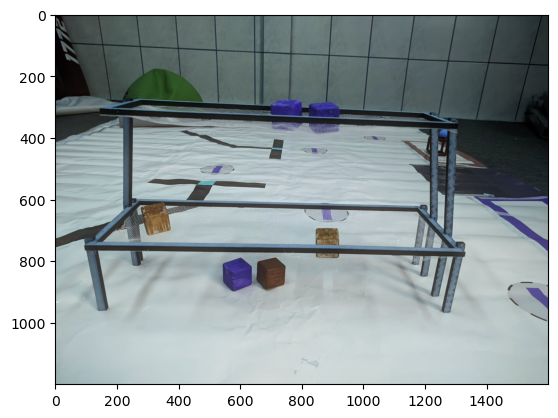

In [141]:
plt.imshow(image)

In [142]:
image = cv2.resize(image, (800, 600))
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [143]:
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)

lower_blue = np.array([90, 80, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

cubos_detectados = []

In [144]:
kernel = np.ones((5, 5), np.uint8)
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)
mask_red = cv2.dilate(mask_red, kernel, iterations=1)

mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
mask_blue = cv2.dilate(mask_blue, kernel, iterations=1)

In [145]:
def detectar_cubos(mask, cor, label, min_area=1200): 
    contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(contorno)
            cv2.rectangle(image, (x, y), (x+w, y+h), cor, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, cor, 2)


In [146]:
detectar_cubos(mask_red, (0, 0, 255), "Red Cube", min_area=1200)
detectar_cubos(mask_blue, (255, 0, 0), "Blue Cube", min_area=700)

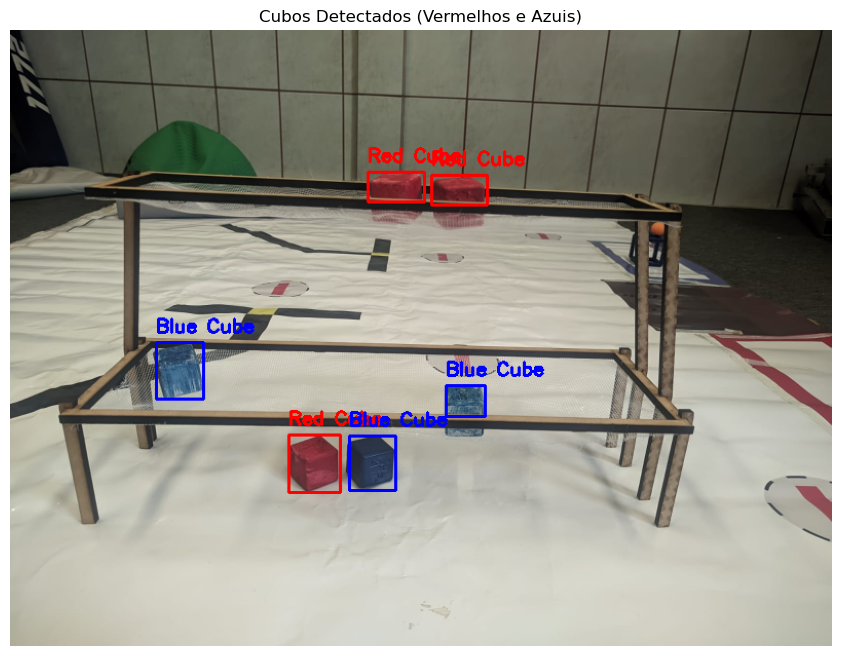

In [147]:
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Cubos Detectados (Vermelhos e Azuis)")
plt.axis("off")
plt.show()